In [24]:
from typing import TypedDict, List
from langgraph.graph import StateGraph
import math

In [25]:
class AgentState(TypedDict):
    name : str
    values : List[int]
    operation : str
    result : str

In [32]:
def operation(state: AgentState) -> AgentState:
    """This function decides if you will add the elements or multiply the elements."""
    
    if state['operation'] == "+":
        state['result'] = f"Hi {state['name']}, your answer is {sum(state['values'])}"
    elif state['operation'] == "*":
        state['result'] = f"Hi {state['name']}, your answer is {math.prod(state['values'])}"
    else:
        raise "Invalid operation"
    return state

In [33]:
graph = StateGraph(AgentState)

graph.add_node("worker", operation)

graph.set_entry_point("worker")
graph.set_finish_point("worker")

app = graph.compile()

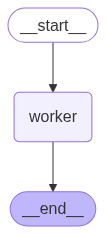

In [34]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [37]:
answer = app.invoke({'name': "Jack", 'values': [1,2,3,4], 'operation': "*"})

In [39]:
print(answer)

{'name': 'Jack', 'values': [1, 2, 3, 4], 'operation': '*', 'result': 'Hi Jack, your answer is 24'}


In [38]:
print(answer['result'])

Hi Jack, your answer is 24
